<a href="https://colab.research.google.com/github/victorm0202/Curso_banxico/blob/Python-basics/07_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

pandas contains data structures and data manipulation tools designed to make data cleaning
and analysis fast and easy in Python. pandas is often used in tandem with numerical
computing tools like NumPy and SciPy, analytical libraries like statsmodels and
scikit-learn, and data visualization libraries like matplotlib. pandas adopts significant
parts of NumPy’s idiomatic style of array-based computing, especially array-based
functions and a preference for data processing without for loops.
While pandas adopts many coding idioms from NumPy, the biggest difference is that
pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast,
is best suited for working with homogeneous numerical array data.


Pandas Cheatsheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

tutorial: https://www.kaggle.com/vikumsw/pandas-tips-tricks-and-more


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib

  Using cached matplotlib-3.3.1-cp37-cp37m-win_amd64.whl (8.5 MB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-7.2.0-cp37-cp37m-win_amd64.whl (2.1 MB)


In [ ]:
def printt(obj, times=2):
  
  print(obj, end=times*'\n')

## Pandas Data Structures

### Series


A Series is a one-dimensional array-like object containing a sequence of values (of
similar types to NumPy types) and an associated array of data labels, called its index.
The simplest Series is formed from only an array of data

In [ ]:
obj = pd.Series([4, 7, -5, 3,0.25, 0.5, 0.75, 1.0])
obj

0    4.00
1    7.00
2   -5.00
3    3.00
4    0.25
5    0.50
6    0.75
7    1.00
dtype: float64

In [ ]:
#You can get the array representation and index object of the Series via
#its values and index attributes
obj.values

array([ 4.  ,  7.  , -5.  ,  3.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [ ]:
obj.index

RangeIndex(start=0, stop=8, step=1)

In [ ]:
# You can create a Series with an index identifying each data point
#with a label

obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
#Compared with NumPy arrays, you can use labels in the index when selecting single
#values or a set of values
obj2['a']

-5

In [ ]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    4
dtype: int64

In [ ]:
#Using NumPy functions or NumPy-like operations, such as filtering with a boolean
#array, scalar multiplication, or applying math functions, will preserve the index-value
#link

obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [ ]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [ ]:

np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [ ]:
# Create from dictionary

sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [ ]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged:: 

### DataFrame 
The dataframe is a two-dimensional data structure. It contains columns.

In [ ]:
pd.DataFrame(np.random.rand(3,5))

,0,1,2,3,4
0,0.620308,0.185553,0.399338,0.850992,0.542545
1,0.665150,0.847169,0.788573,0.811243,0.391522
2,0.401148,0.299515,0.403530,0.881507,0.186309


In [ ]:
data = {'Country' : ['Belgium', 'India', 'Brazil' ],
        'Capital': ['Brussels', 'New Delhi', 'Brassilia'],
        'Population': [1234,1234,1234]}
datas = pd.DataFrame(data, index=['Country','Capital','tamal'])
print(type(data))
print(type(datas))

<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
datas

,Country,Capital,Population
Country,Belgium,Brussels,1234
Capital,India,New Delhi,1234
tamal,Brazil,Brassilia,1234


In [ ]:
# Construct DF from dictionary
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame


,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [ ]:
# Usando list comprehension
data2 = [{'a': i, 'b': 2 * i}
        for i in range(5)]
pd.DataFrame(data2)


,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8


In [ ]:
frame.tail(3) # muestra las primeras n renglones, 5 por default

,state,year,pop
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [ ]:
#If you specify a sequence of columns, the DataFrame’s columns will be arranged in
#that order:
pd.DataFrame(data, columns=['year', 'state', 'pop'])



,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [ ]:
#If you pass a column that isn’t contained in the dict, it will appear with missing values
#in the result
pd.DataFrame(data, columns=['year', 'state', 'pop','debt'])


,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [ ]:
# Agregar una columna
frame2=pd.DataFrame(data, columns=['year', 'state', 'pop','debt'])
frame2['debt']=np.arange(6)
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,0
1,2001,Ohio,1.7,1
2,2002,Ohio,3.6,2
3,2001,Nevada,2.4,3
4,2002,Nevada,2.9,4
5,2003,Nevada,3.2,5


In [ ]:
frame2=pd.DataFrame(frame2, columns=['year', 'state', 'pop','debt','inc'])
income=pd.Series([4,6,8],index=[0,3,5])
frame2['inc']=income
frame2

,year,state,pop,debt,inc
0,2000,Ohio,1.5,0,4.0
1,2001,Ohio,1.7,1,NaN
2,2002,Ohio,3.6,2,NaN
3,2001,Nevada,2.4,3,6.0
4,2002,Nevada,2.9,4,NaN
5,2003,Nevada,3.2,5,8.0


In [ ]:
frame2['revenue']=2.5*frame2['pop'] - frame2['debt']
frame2

,year,state,pop,debt,inc,revenue
0,2000,Ohio,1.5,0,4.0,3.75
1,2001,Ohio,1.7,1,NaN,3.25
2,2002,Ohio,3.6,2,NaN,7.00
3,2001,Nevada,2.4,3,6.0,3.00
4,2002,Nevada,2.9,4,NaN,3.25
5,2003,Nevada,3.2,5,8.0,3.00


In [ ]:
#Abrir archivos existentes
#https://github.com/justmarkham/pandas-videos/tree/master/data
imdb=pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/imdb_1000.csv')
imdb.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
titanic=pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Essential  Functionality



### Reindexin

In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [ ]:
#Calling reindex on this Series rearranges the data according to the new index, introducing
#missing values if any index values were not already present:

obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [ ]:
#With DataFrame, reindex can alter either the (row) index, columns, or both. When
#passed only a sequence, it reindexes the rows in the result:

frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
index=['a', 'c', 'd'],
columns=['Ohio', 'Texas', 'California'])

frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [ ]:
# Reindexin colums
states = ['Texas', 'Utah', 'California']
frame3=frame.reindex(columns=states)
frame3


,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


###  Dropping Entries from an Axis

In [ ]:
# Drop in series  No modifica al objeto original
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop('c')


a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [ ]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [ ]:
# Drop DataFrames
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
index=['Ohio', 'Colorado', 'Utah', 'New York'],
columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [ ]:
data.drop(['two', 'four'], axis='columns')


,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [ ]:
#which modify the size or shape of a Series or DataFrame,
#can manipulate an object in-place without returning a new object

obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection, and Filtering

In [ ]:
obj = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])

In [ ]:
obj[2:4]

c    2
d    3
dtype: int32

In [ ]:
obj[['b', 'a', 'd']]

b    1
a    0
d    3
dtype: int32

In [ ]:
data = pd.DataFrame(np.arange(36).reshape((6, 6)),
index=['Ohio', 'Colorado', 'Utah', 'New York','Miami','Springfield'],
columns=['one', 'two', 'three', 'four','five','six'])
data

,one,two,three,four,five,six
Ohio,0,1,2,3,4,5
Colorado,6,7,8,9,10,11
Utah,12,13,14,15,16,17
New York,18,19,20,21,22,23
Miami,24,25,26,27,28,29
Springfield,30,31,32,33,34,35


In [ ]:
data[:2][['one','two']]

,one,two
Ohio,0,1
Colorado,6,7


In [ ]:
# Select by label metodo loc
data.loc[['Colorado','Utah'],['one','four']]

,one,four
Colorado,6,9
Utah,12,15


In [ ]:
# Select by position método iloc
data.iloc[2,2]

14

In [ ]:
# Combinar subsetting
data.iloc[:,:4][data.six>15]

,one,two,three,four
Utah,12,13,14,15
New York,18,19,20,21
Miami,24,25,26,27
Springfield,30,31,32,33


In [ ]:
# Rename
imdb.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [ ]:
#Crear nuevo on
imdb2=imdb.rename(columns={'title':'titulo'})
#imdb2.head()
#imdb.head()

### Arithmetic methods with fill values

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df2.loc[1, 'b'] = np.nan


In [ ]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [ ]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Using the add method on df1, I pass df2 and an argument to fill_value
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


###Function Application and Mapping

In [ ]:
#NumPy ufuncs (element-wise array methods)

frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
np.exp(frame)

,b,d,e
Utah,1.335516,1.018705,0.129018
Ohio,0.180652,6.670595,3.084903
Texas,0.835057,1.787244,1.424684
Oregon,0.665957,1.017749,1.724786


In [ ]:
frame

,b,d,e
Utah,0.289317,0.018532,-2.047801
Ohio,-1.711180,1.897709,1.126520
Texas,-0.180256,0.580675,0.353950
Oregon,-0.406530,0.017593,0.545103


In [ ]:
#applying a function on one-dimensional arrays to each column or row

frame.apply(lambda x: x.max()-x.min())  # Columns by default

b    2.000498
d    1.880116
e    3.174322
dtype: float64

In [ ]:
# Apply function in rows
frame.apply((lambda x: x.mean()), axis='columns')

Utah     -0.579984
Ohio      0.437683
Texas     0.251456
Oregon    0.052055
dtype: float64

In [ ]:
## Apply function in columns
frame.apply((lambda x: x.mean()), axis='rows')


b   -0.502162
d    0.628627
e   -0.005557
dtype: float64

### Sorting and Rankin

In [ ]:
# Sort by index
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [ ]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
index=['three', 'one'],
columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [ ]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [ ]:
frame.sort_values(by='b')

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
frame.sort_values(by=['a', 'b'])

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [ ]:
# Rankin
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [ ]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [ ]:
#Ranks can also be assigned according to the order in which they’re observed in the data
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [ ]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [ ]:
#DataFrame can compute ranks over the rows or the columns

frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [ ]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


In [ ]:
frame.rank(axis='rows')

,b,a,c
0,3.0,1.5,2.0
1,4.0,3.5,3.0
2,1.0,1.5,4.0
3,2.0,3.5,1.0


### Selection and Filtering

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#By column´s name
titanic['Name'].head()
#titanic.Name

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
#By Index
titanic[7:15]
#titanic.loc[7:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [ ]:
#Single observation

titanic.iloc[[2],[5]]

,Age
2,26.0


In [ ]:
titanic['Name'][3]
#titanic.Name[0]
#titanic.loc[0,'Name']

'Futrelle, Mrs. Jacques Heath (Lily May Peel)'

In [ ]:
# Datos únicos
titanic.Survived.unique()
#set(titanic.Survived)

array([0, 1], dtype=int64)

In [ ]:
# n sample
titanic.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S


In [ ]:
titanic.sample(frac=0.005)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S


In [ ]:
#By bolean
titanic[titanic['Age']>60].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [ ]:
myfilter=np.logical_and(titanic.Age>60,titanic.Survived==1)
titanic[myfilter]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [ ]:
myfilter2=np.logical_and(titanic.Age<30,titanic.Sex=='female')
titanic[myfilter2].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic[(titanic.Age<30) & (titanic.Sex=='female')].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Summarizing and Computing Descriptive Statistics

In [ ]:
#Sort
titanic[titanic.Age<30].sort_values('Age').head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C


In [ ]:
titanic.sort_values('Sex',ascending=False).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S


In [ ]:
#summary
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Tabla de  frecuencias
pd.value_counts(titanic.Sex)


male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

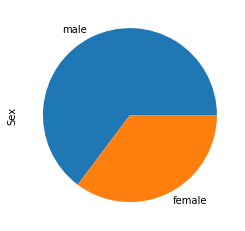

In [ ]:
pd.value_counts(titanic.Sex).plot(kind='pie')


In [ ]:
# Tablas de contigencia
pd.crosstab(titanic.Sex,titanic.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
.....: [np.nan, np.nan], [0.75, -1.3]],
.....: index=['a', 'b', 'c', 'd'],
.....: columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [ ]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [ ]:
#Passing axis='columns' or axis=1 sums across the columns instead
df.sum(axis='columns')


a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [ ]:
#NA values are excluded unless the entire slice (row or column in this case) is NA.
#This can be disabled with the skipna option:

df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [ ]:
df.median()

one    1.4
two   -2.9
dtype: float64

In [ ]:
df.quantile([0.25,0.75])

,one,two
0.25,1.075,-3.7
0.75,4.250,-2.1


In [ ]:
# Correlation and Covariance
data=pd.DataFrame(np.random.randint(2,78,60).reshape(10,6), index=np.arange(10), columns=list('abcdef'))
data

,a,b,c,d,e,f
0,6,65,8,42,51,27
1,68,54,24,21,18,77
2,25,40,28,42,10,44
3,24,36,28,6,39,9
4,9,6,7,30,11,71
5,18,10,33,49,4,77
6,48,21,31,55,62,65
7,31,77,2,10,45,9
8,54,74,41,33,16,27
9,10,65,26,44,26,33


In [ ]:
# one on one
printt('correlacion entre columnas A y B :{}'.format(data['a'].corr(data['b'])))
printt('covarianza entre columnas A y B :{}'.format(data['a'].cov(data['b'])))

correlacion entre columnas A y B :0.21727756038861867

covarianza entre columnas A y B :119.39999999999998



In [ ]:
# Matriz de varianzas y covarianzas
data.cov()

,a,b,c,d,e,f
a,440.233333,119.400000,116.955556,-58.844444,13.266667,118.144444
b,119.400000,685.955556,-41.044444,-135.177778,133.822222,-474.800000
c,116.955556,-41.044444,163.288889,73.711111,-73.844444,63.866667
d,-58.844444,-135.177778,73.711111,270.400000,-14.488889,221.022222
e,13.266667,133.822222,-73.844444,-14.488889,392.400000,-223.533333
f,118.144444,-474.800000,63.866667,221.022222,-223.533333,721.877778


In [ ]:
#Matriz de correlación
data.corr()

,a,b,c,d,e,f
a,1.000000,0.217278,0.436215,-0.170554,0.031919,0.209575
b,0.217278,1.000000,-0.122639,-0.313873,0.257938,-0.674731
c,0.436215,-0.122639,1.000000,0.350793,-0.291726,0.186022
d,-0.170554,-0.313873,0.350793,1.000000,-0.044480,0.500266
e,0.031919,0.257938,-0.291726,-0.044480,1.000000,-0.419997
f,0.209575,-0.674731,0.186022,0.500266,-0.419997,1.000000


In [ ]:
#compute pairwise correlations between a DataFrame’s columns or rows with another Series or DataFrame
data.corrwith(data.c)

a    0.436215
b   -0.122639
c    1.000000
d    0.350793
e   -0.291726
f    0.186022
dtype: float64

In [ ]:
data.var()

a    440.233333
b    685.955556
c    163.288889
d    270.400000
e    392.400000
f    721.877778
dtype: float64

In [ ]:
data.std()

a    20.981738
b    26.190753
c    12.778454
d    16.443844
e    19.809089
f    26.867783
dtype: float64